# 2c Data Analysis

## Setup

In [101]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [102]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
rng = np.random.default_rng()
pd.set_option('mode.copy_on_write', True)
plt.style.use('fivethirtyeight')

# Colorblind-friendly colors
global_colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# read the data
df = pd.read_excel('2c Data.xlsx')

# hard variables
whitehchapelCapacity = 62000
bikeLaneCapacity = 12000
busLaneCapacity = 5000
pedestrianCapacity = 15000
carLaneCapacity = 1500
tramLaneCapacity = 18000

In [103]:
df_out = df[df['ID2'].str.contains('OUT')]
df_lis = df[~df['ID2'].str.contains('OUT')]

df_out_yes = df_out[df_out['health'].str.contains('Yes')]
df_out_no = df_out[df_out['health'].str.contains('No')]
df_lis_yes = df_lis[df_lis['health'].str.contains('Yes')]
df_lis_no = df_lis[df_lis['health'].str.contains('No')]


In [206]:
# permutation test function
def permutation_test(data1, data2, n_permutations):
    """
    Perform a permutation test to compare the means of two datasets.

    Parameters:
    data1 (array-like): The first dataset.
    data2 (array-like): The second dataset.
    n_permutations (int): The number of permutations to perform.

    Returns:
    obs_diff (float): The observed difference in means between the two datasets.
    p_value (float): The p-value of the permutation test.
    """
    # Compute the observed difference in means
    obs_diff = np.mean(data2) - np.mean(data1)

    # Concatenate the data and shuffle the labels
    data = np.concatenate([data1, data2])
    diffs = np.zeros(n_permutations)
    for i in range(n_permutations):
        np.random.shuffle(data)
        permuted_data1 = data[:len(data1)]
        permuted_data2 = data[len(data1):]
        diffs[i] = np.mean(permuted_data2) - np.mean(permuted_data1)

    # Compute the p-value
    p_value = np.sum(diffs >= obs_diff) / n_permutations

    print(f"Observed difference in means: {obs_diff:.2f}")
    print(f"P-value: {p_value:.4f}")

    return obs_diff, p_value

## Headline

### Ethnicity

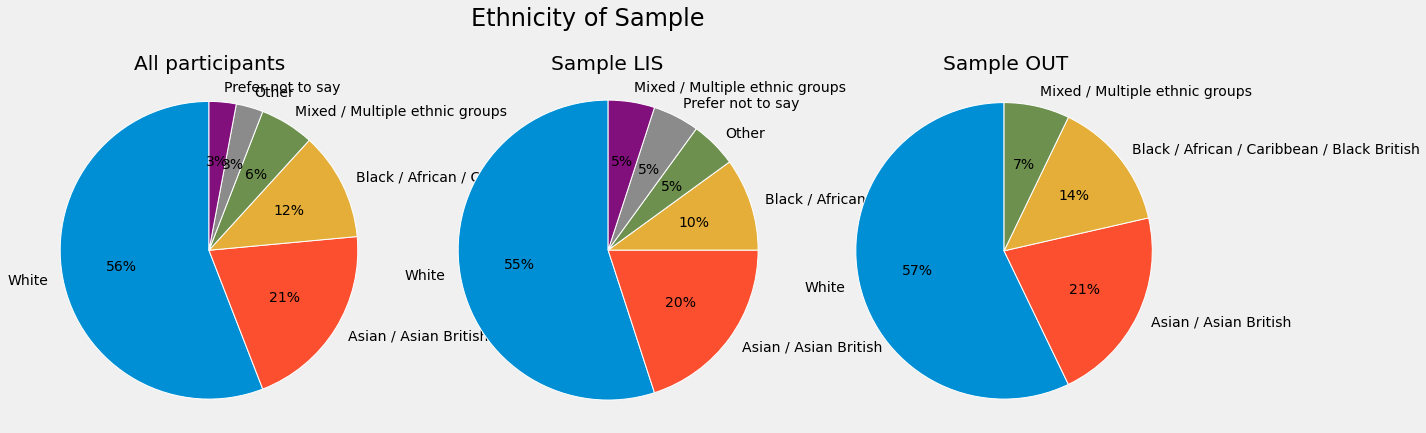

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].pie(df.iloc[:, 11].value_counts(), labels=df.iloc[:, 11].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All participants')
axs[0].axis('equal')

groups = df.groupby('sample')

for i, (name, group) in enumerate(groups):
    axs[i+1].pie(group.iloc[:, 11].value_counts(), labels=group.iloc[:, 11].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
    axs[i+1].set_title(f'Sample {name}')
    axs[i+1].axis('equal')

fig.suptitle('Ethnicity of Sample', fontsize=24, y=1.04)

#fig.legend(df.iloc[:, 11].value_counts().index, loc='center', bbox_to_anchor=(0.5, 0.1), ncol=6)

plt.show()

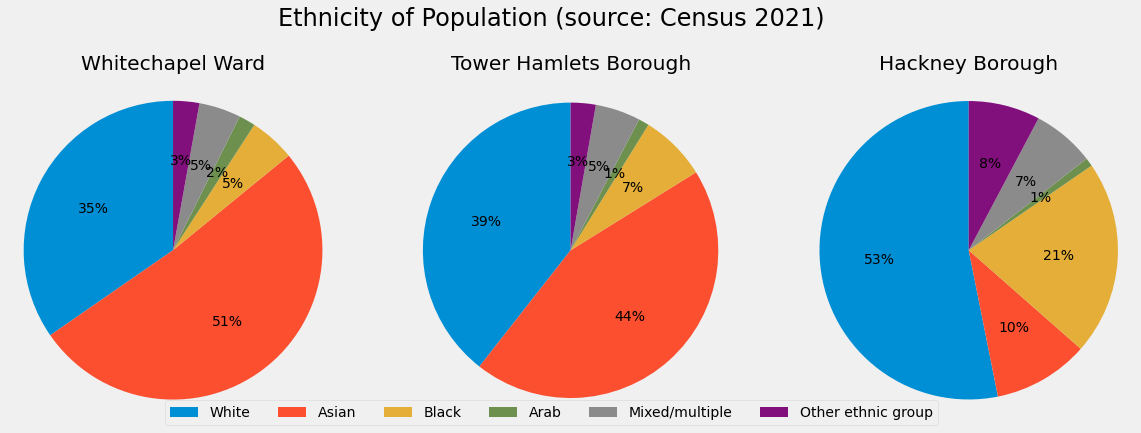

In [105]:
data1 = pd.DataFrame({
    '': ['White', 'Asian', 'Black', 'Arab', 'Mixed/multiple', 'Other ethnic group'],
    'count': [6527, 9659, 930, 337, 854, 534]
})

data2 = pd.DataFrame({
    '': ['White', 'Asian', 'Black', 'Arab', 'Mixed/multiple', 'Other ethnic group'],
    'count': [122250, 137838, 22687, 3587, 15320, 8500]
})

data3 = pd.DataFrame({
    '': ['White', 'Asian', 'Black', 'Arab', 'Mixed/multiple', 'Other ethnic group'],
    'count': [137709, 26885, 54645, 2342, 17487, 20079]
})

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(data1['count'], labels=None, autopct='%1.f%%', startangle=90)
axs[0].set_title('Whitechapel Ward')
axs[0].axis('equal')

axs[1].pie(data2['count'], labels=None, autopct='%1.f%%', startangle=90)
axs[1].set_title('Tower Hamlets Borough')
axs[1].axis('equal')

axs[2].pie(data3['count'], labels=None, autopct='%1.f%%', startangle=90)
axs[2].set_title('Hackney Borough')
axs[2].axis('equal')

fig.suptitle('Ethnicity of Population (source: Census 2021)', fontsize=24, y=1.04)

fig.legend(data1[''], loc='center', bbox_to_anchor=(0.5, 0.1), ncol=6)

plt.show()

### Age

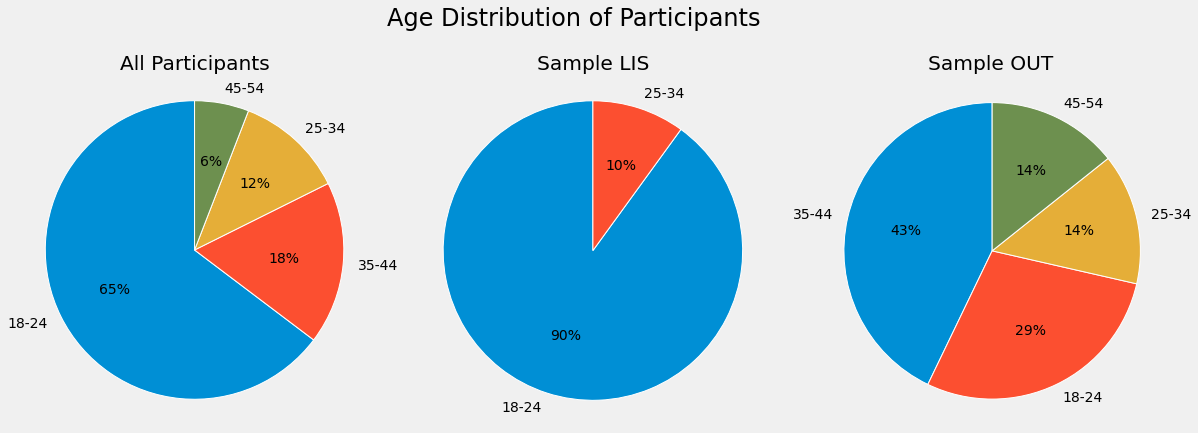

In [106]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(df['age'].value_counts(), labels=df['age'].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants')
axs[0].axis('equal')

groups = df.groupby('sample')

for i, (name, group) in enumerate(groups):
    axs[i+1].pie(group['age'].value_counts(), labels=group['age'].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
    axs[i+1].set_title(f'Sample {name}')
    axs[i+1].axis('equal')

fig.suptitle('Age Distribution of Participants', fontsize=24, y=1.04)

plt.show()

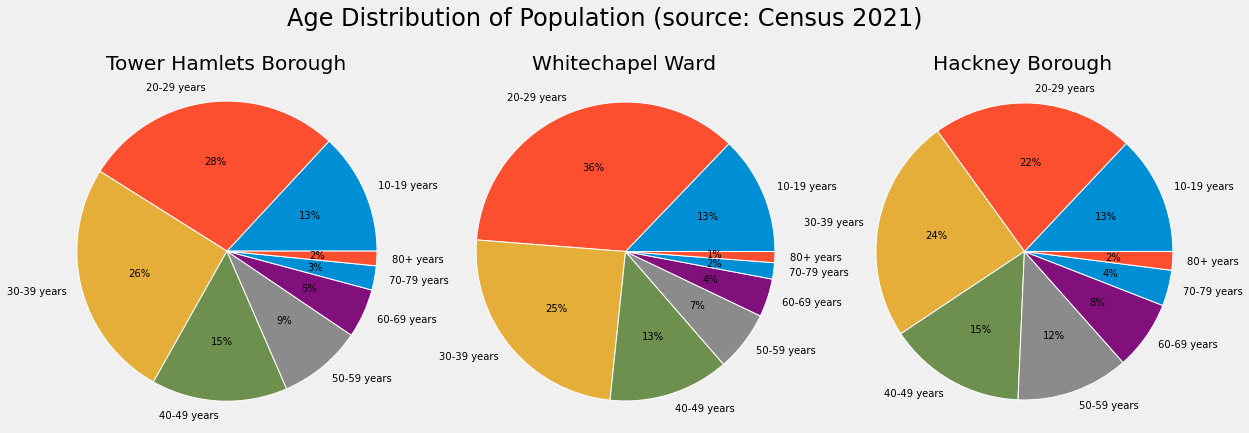

In [107]:
labels = ['10-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60-69 years', '70-79 years', '80+ years']
sizes1 = [35803, 76471, 70467, 40100, 24686, 14442, 7137, 4274]
sizes2 = [2158, 6043, 4134, 2193, 1096, 695, 297, 201]
sizes3 = [29543, 50125, 55558, 34101, 27916, 17120, 8875, 4614]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(sizes1, labels=labels, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 10}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=0)
axs[0].set_title('Tower Hamlets Borough')
axs[0].axis('equal')

axs[1].pie(sizes2, labels=labels, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 10}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=0)
axs[1].set_title('Whitechapel Ward')
axs[1].axis('equal')

axs[2].pie(sizes3, labels=labels, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 10}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=0)
axs[2].set_title('Hackney Borough')
axs[2].axis('equal')

fig.suptitle('Age Distribution of Population (source: Census 2021)', fontsize=24, y=1.04)

plt.show()

### Gender

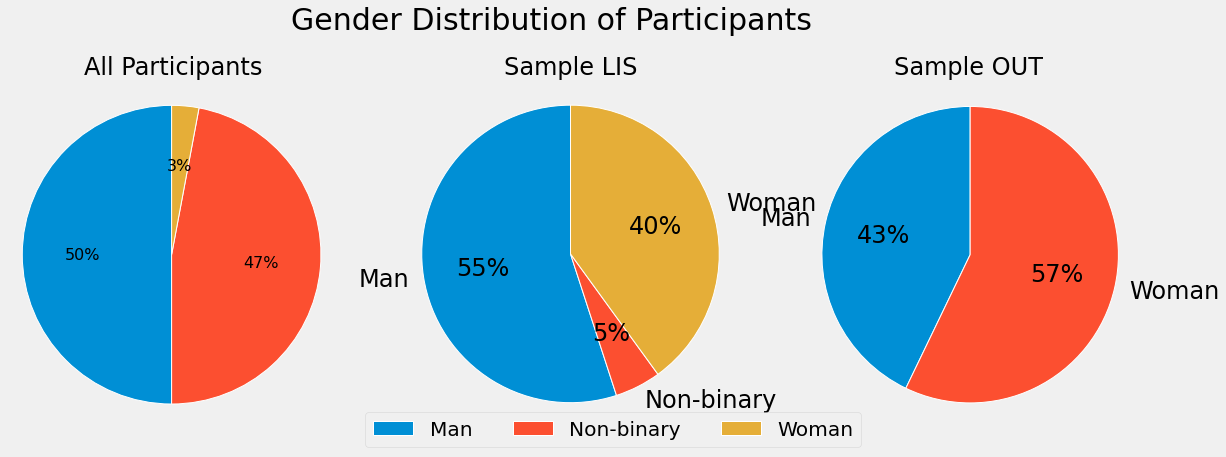

In [108]:
labels = ['Man', 'Non-binary', 'Woman']
sizes_all = df['gender'].value_counts().values

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(sizes_all, labels=None, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 16}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

groups = df.groupby('sample')

for i, (name, group) in enumerate(groups):
    groupSorted = group['gender'].value_counts().sort_index()
    axs[i+1].pie(groupSorted, labels=groupSorted.index, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
    axs[i+1].set_title(f'Sample {name}', fontsize=24)
    axs[i+1].axis('equal')

fig.suptitle('Gender Distribution of Participants', fontsize=30, y=1.05)

fig.legend(labels, loc='lower center', ncol=3, fontsize='x-large')

plt.show()

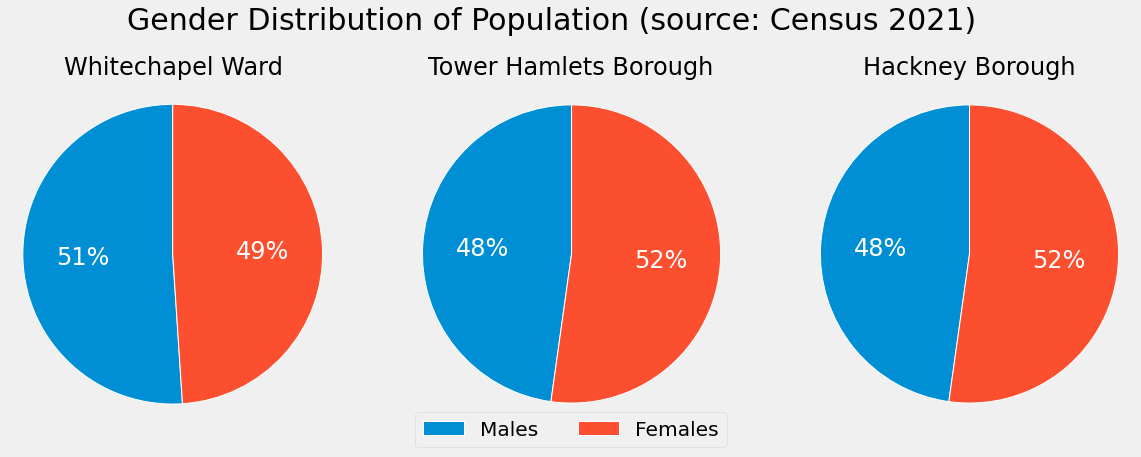

In [109]:
labels = ['Males', 'Females']
sizes1 = [9612, 9221]
sizes2 = [123842, 135303]
sizes3 = [123842, 135303]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(sizes1, labels=None, autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('Whitechapel Ward', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes2, labels=None, autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('Tower Hamlets Borough', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes3, labels=None, autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('Hackney Borough', fontsize=24)
axs[2].axis('equal')

fig.suptitle('Gender Distribution of Population (source: Census 2021)', fontsize=30, y=1.05)

fig.legend(labels, loc='lower center', ncol=2, fontsize='x-large')

plt.show()

### How often do you drive?

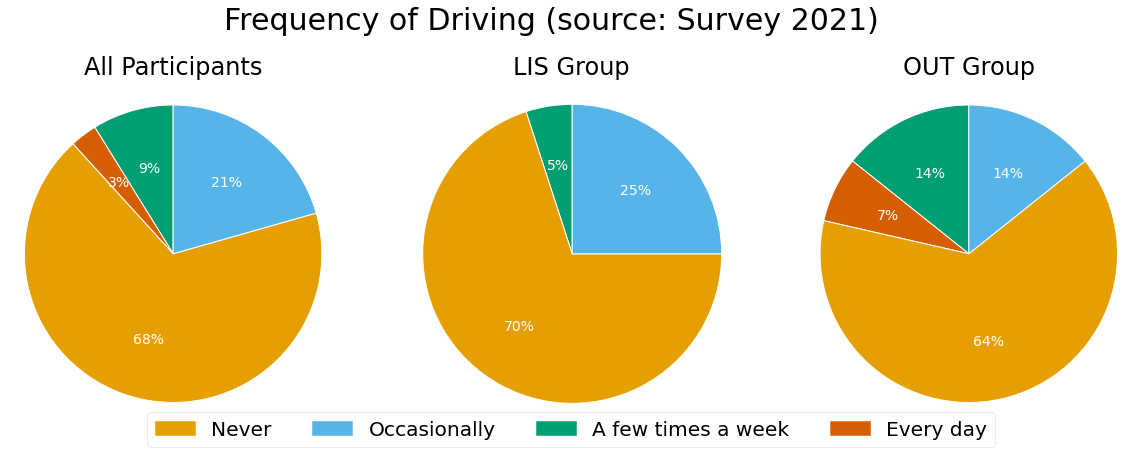

In [110]:
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['drive_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['drive_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['drive_freq'].value_counts().sort_index().values

colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

axs[0].pie(sizes_all, colors=[colors[x] for x in df['drive_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['drive_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['drive_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

fig.suptitle('Frequency of Driving (source: Survey 2021)', fontsize=30, y=1.05)

patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

plt.show()

### How often do you take public transport?

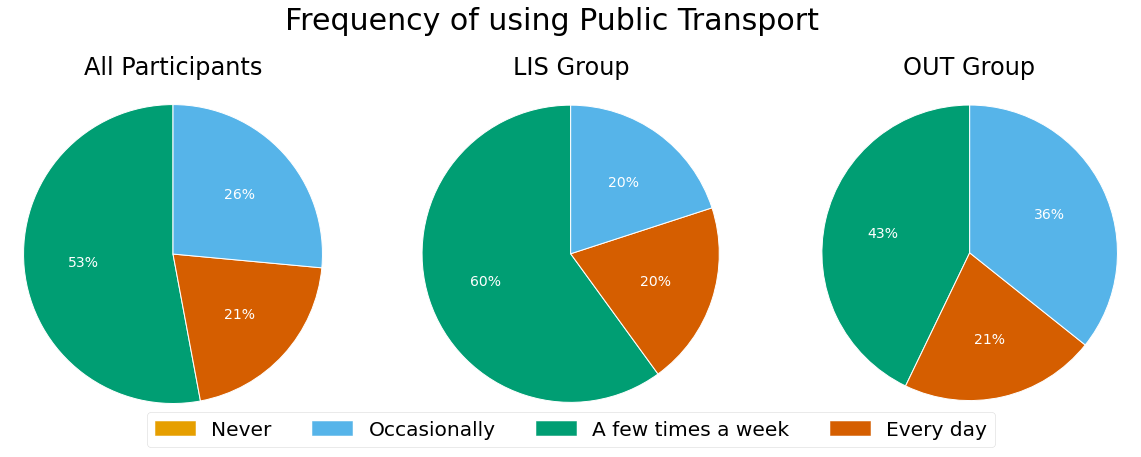

In [111]:
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['public_transport_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['public_transport_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['public_transport_freq'].value_counts().sort_index().values

colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

axs[0].pie(sizes_all, colors=[colors[x] for x in df['public_transport_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['public_transport_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['public_transport_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

fig.suptitle('Frequency of using Public Transport', fontsize=30, y=1.05)

patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

plt.show()

### How often do you walk or wheel (use a wheel chair)?

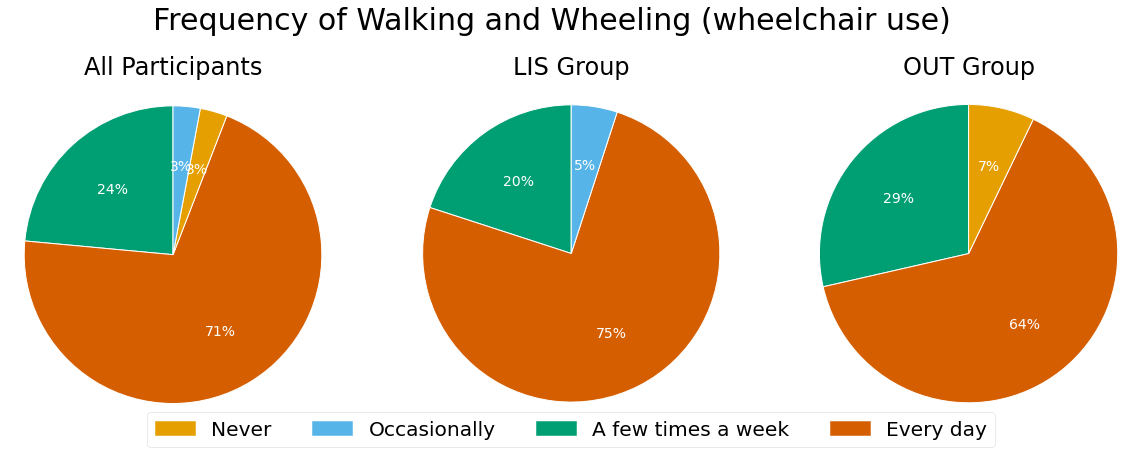

In [112]:
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['walk_wheel_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['walk_wheel_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['walk_wheel_freq'].value_counts().sort_index().values

colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

axs[0].pie(sizes_all, colors=[colors[x] for x in df['walk_wheel_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['walk_wheel_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['walk_wheel_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

fig.suptitle('Frequency of Walking and Wheeling (wheelchair use)', fontsize=30, y=1.05)

patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

plt.show()

### How often do you cycle or scoot?

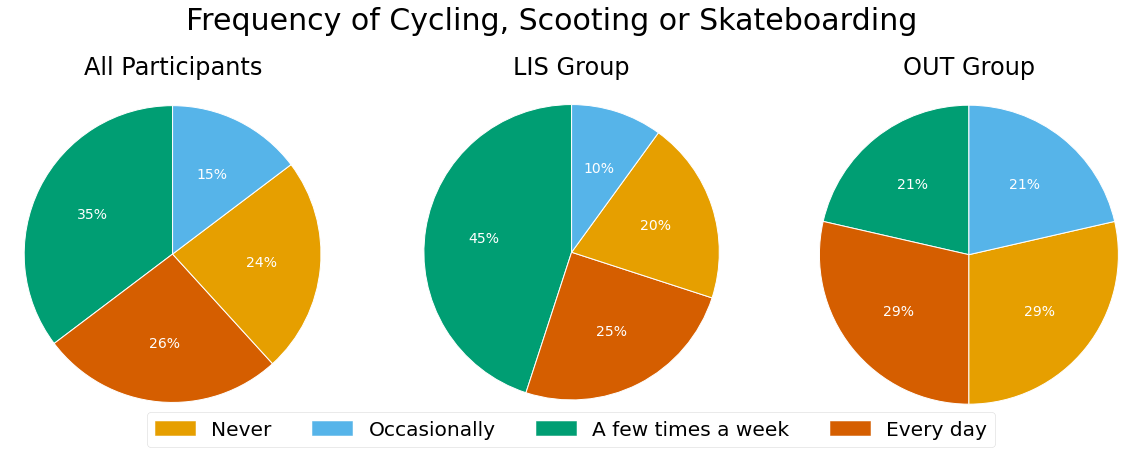

In [113]:
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['cycle_scoot_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['cycle_scoot_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['cycle_scoot_freq'].value_counts().sort_index().values

colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

axs[0].pie(sizes_all, colors=[colors[x] for x in df['cycle_scoot_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['cycle_scoot_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['cycle_scoot_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

fig.suptitle('Frequency of Cycling, Scooting or Skateboarding', fontsize=30, y=1.05)

patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

plt.show()

### How do you usually travel to work?

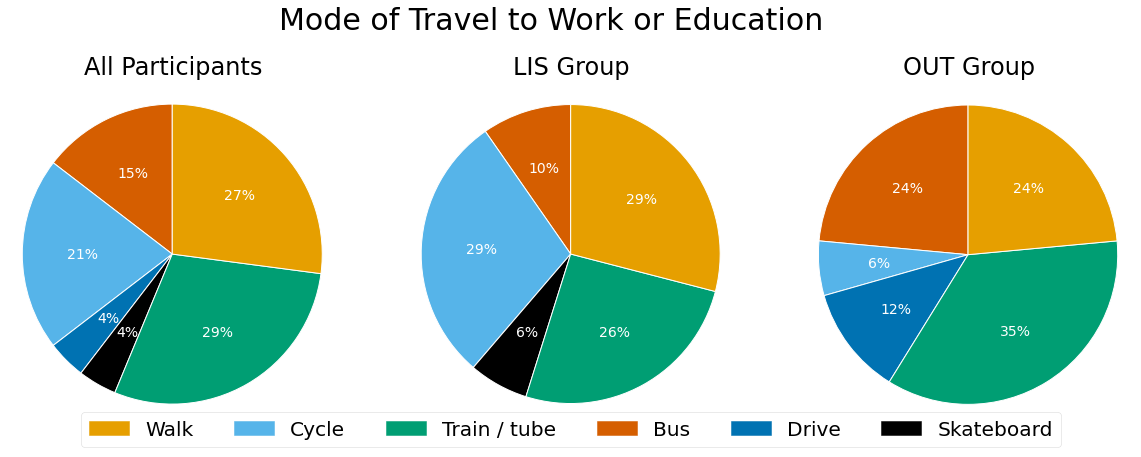

In [114]:
commute_mode = df['commute_mode'].fillna('')

commute_mode_counts = pd.DataFrame(commute_mode.str.split(';').tolist()).stack().value_counts().sort_index()
commute_mode_counts = commute_mode_counts[commute_mode_counts.index != '']  # exclude empty strings
commute_mode_counts_lis = pd.DataFrame(df[df['sample'] == 'LIS']['commute_mode'].fillna('').str.split(';').tolist()).stack().value_counts().sort_index()
commute_mode_counts_lis = commute_mode_counts_lis[commute_mode_counts_lis.index != '']  # exclude empty strings
commute_mode_counts_out = pd.DataFrame(df[df['sample'] == 'OUT']['commute_mode'].fillna('').str.split(';').tolist()).stack().value_counts().sort_index()
commute_mode_counts_out = commute_mode_counts_out[commute_mode_counts_out.index != '']  # exclude empty strings

labels = ['Walk', 'Drive', 'Train / Tube', 'Cycle', 'Bus', 'Skateboard']
sizes_all = commute_mode_counts.values
sizes_lis = commute_mode_counts_lis.values
sizes_out = commute_mode_counts_out.values

colors = {'Walk': global_colors[1], 'Cycle': global_colors[2], 'Train / tube': global_colors[3], 'Bus': global_colors[4], 'Drive': global_colors[5], 'Skateboard': global_colors[0]}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

axs[0].pie(sizes_all, colors=[colors[x] for x in commute_mode_counts.index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes_lis, colors=[colors[x] for x in commute_mode_counts_lis.index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes_out, colors=[colors[x] for x in commute_mode_counts_out.index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

fig.suptitle('Mode of Travel to Work or Education', fontsize=30, y=1.05)

patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=6, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

plt.show()

## Capacity

In [115]:
print('Mean of capacity for OUT Yes: ', df_out_yes['capacity'].mean())
print('Median of capacity for OUT Yes: ', df_out_yes['capacity'].median())
print("\n")
print('Mean of capacity for OUT No: ', df_out_no['capacity'].mean())
print('Median of capacity for OUT No: ', df_out_no['capacity'].median())
print("\n")
print('Mean of capacity for LIS Yes: ', df_lis_yes['capacity'].mean())
print('Median of capacity for LIS Yes: ', df_lis_yes['capacity'].median())
print("\n")
print('Mean of capacity for LIS No: ', df_lis_no['capacity'].mean())
print('Median of capacity for LIS No: ', df_lis_no['capacity'].median())
print("\n")

print('Mean of capacity for OUT: ', df_out['capacity'].mean())
print('Median of capacity for OUT: ', df_out['capacity'].median())
print('Mean of capacity for LIS: ', df_lis['capacity'].mean())
print('Median of capacity for LIS: ', df_lis['capacity'].median())
print("\n")
print('Mean of capacity for whole dataframe: ', df['capacity'].mean())
print('Median of capacity for whole dataframe: ', df['capacity'].median())


Mean of capacity for OUT Yes:  61500.0
Median of capacity for OUT Yes:  62000.0


Mean of capacity for OUT No:  66714.28571428571
Median of capacity for OUT No:  63000.0


Mean of capacity for LIS Yes:  78900.0
Median of capacity for LIS Yes:  73500.0


Mean of capacity for LIS No:  70900.0
Median of capacity for LIS No:  67000.0


Mean of capacity for OUT:  64107.142857142855
Median of capacity for OUT:  62500.0
Mean of capacity for LIS:  74900.0
Median of capacity for LIS:  70000.0


Mean of capacity for whole dataframe:  70455.88235294117
Median of capacity for whole dataframe:  66500.0


### Capacity

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


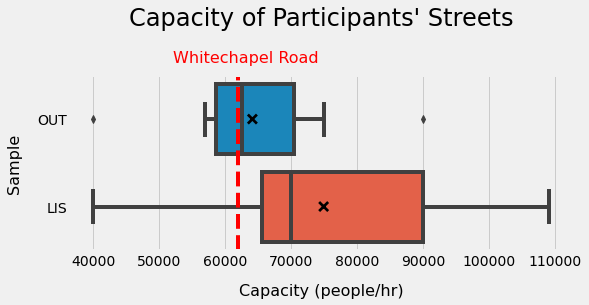

In [116]:
#fig, ax = plt.subplots(figsize=(8, 3), facecolor='white')
fig, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(data=df, x="capacity", y="sample", ax=ax)
sns.pointplot(data=df, x="capacity", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None)
plt.axvline(x=62000, color='red', linestyle='--', label='Whitechapel Road')

plt.xlabel("Capacity (people/hr)", fontsize=16, labelpad=15)
plt.ylabel("Sample", fontsize=16, labelpad=15)
plt.title("Capacity of Participants' Streets", fontsize=24, pad=50)

ax.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax.transAxes, fontsize=16, color='red')

#plt.gca().set_facecolor('white')

plt.show()

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


Text(0.35, 1.1, 'Whitechapel Road')

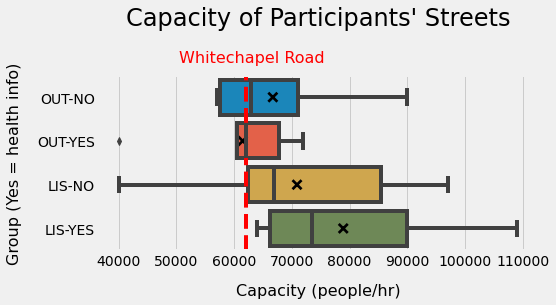

In [117]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(data=df, x="capacity", y="group")
plt.axvline(x=62000, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="capacity", y="group", color="black", join=False, markers="x", scale=0.5, ci=None)

plt.xlabel("Capacity (people/hr)", fontsize=16, labelpad=15)
plt.ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
plt.title("Capacity of Participants' Streets", fontsize=24, pad=50)

ax.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax.transAxes, fontsize=16, color='red')

<AxesSubplot:xlabel='Bike lane number (or scooter)', ylabel='group'>

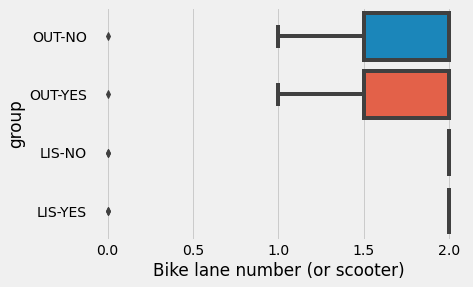

In [118]:
sns.boxplot(data=df, x="Bike lane number (or scooter)", y="group")

<AxesSubplot:xlabel='Bike lane number (or scooter)', ylabel='group'>

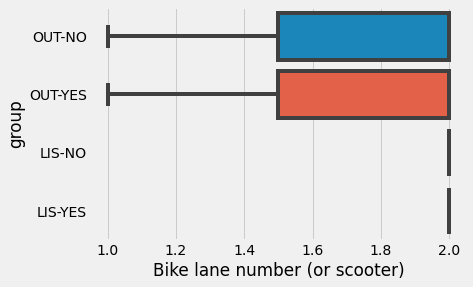

In [119]:
sns.boxplot(data=df, x="Bike lane number (or scooter)", y="group", showfliers=False)

<AxesSubplot:xlabel='bike_lane_width', ylabel='group'>

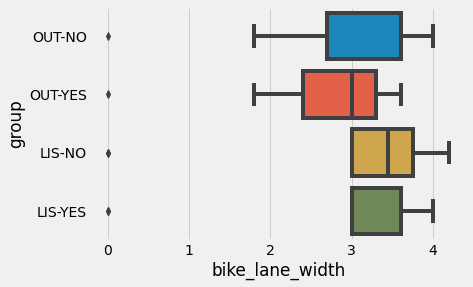

In [120]:
sns.boxplot(data=df, x="bike_lane_width", y="group")

<AxesSubplot:xlabel='bike_lane_width', ylabel='group'>

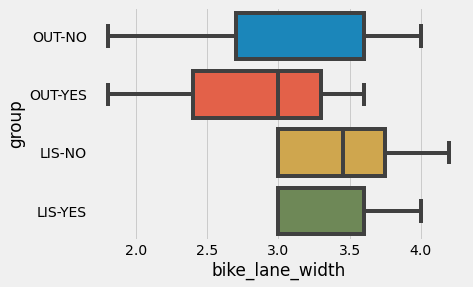

In [121]:
sns.boxplot(data=df, x="bike_lane_width", y="group", showfliers = False)

## Adjusting for difference (calibration error)

In [122]:
df.groupby('group')['capacity'].mean(), df.groupby('sample')['capacity'].mean()

(group
 LIS-NO     70900.000000
 LIS-YES    78900.000000
 OUT-NO     66714.285714
 OUT-YES    61500.000000
 Name: capacity, dtype: float64,
 sample
 LIS    74900.000000
 OUT    64107.142857
 Name: capacity, dtype: float64)

In [123]:
df['capacity diff'] = df['capacity'] - df.groupby('group')['capacity'].transform('mean')

In [124]:
df[['group', 'capacity', 'capacity diff']]

,group,capacity,capacity diff
0,OUT-NO,57000,-9714.285714
1,OUT-YES,64000,2500.000000
2,OUT-NO,90000,23285.714286
3,OUT-YES,60500,-1000.000000
4,OUT-NO,67000,285.714286
5,LIS-NO,93000,22100.000000
6,LIS-YES,75000,-3900.000000
7,LIS-NO,62000,-8900.000000
8,LIS-YES,67000,-11900.000000
9,LIS-NO,57000,-13900.000000


<AxesSubplot:xlabel='capacity diff', ylabel='group'>

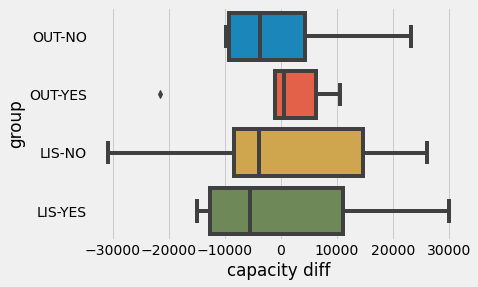

In [125]:
sns.boxplot(data=df, x="capacity diff", y="group")

In [126]:
df['capacity diff sample'] = df['capacity'] - df.groupby('sample')['capacity'].transform('mean')

In [127]:
df[['group', 'capacity', 'capacity diff', 'capacity diff sample']]

,group,capacity,capacity diff,capacity diff sample
0,OUT-NO,57000,-9714.285714,-7107.142857
1,OUT-YES,64000,2500.000000,-107.142857
2,OUT-NO,90000,23285.714286,25892.857143
3,OUT-YES,60500,-1000.000000,-3607.142857
4,OUT-NO,67000,285.714286,2892.857143
5,LIS-NO,93000,22100.000000,18100.000000
6,LIS-YES,75000,-3900.000000,100.000000
7,LIS-NO,62000,-8900.000000,-12900.000000
8,LIS-YES,67000,-11900.000000,-7900.000000
9,LIS-NO,57000,-13900.000000,-17900.000000


<AxesSubplot:xlabel='capacity diff sample', ylabel='group'>

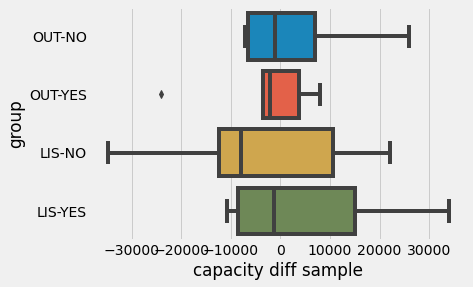

In [128]:
sns.boxplot(data=df, x="capacity diff sample", y="group")

<AxesSubplot:xlabel='capacity diff sample', ylabel='sample'>

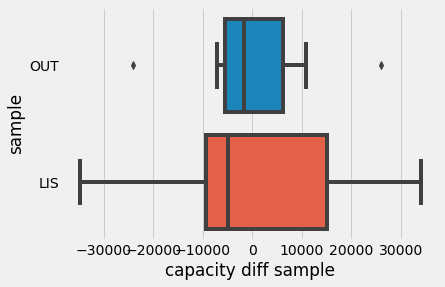

In [260]:
sns.boxplot(data=df, x="capacity diff sample", y="sample")

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


Text(0.2, 1.1, 'Whitechapel Road')

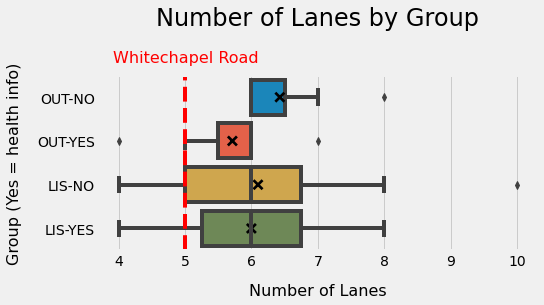

In [129]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(data=df, x="number_of_lanes", y="group")
plt.axvline(x=5, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="number_of_lanes", y="group", color="black", join=False, markers="x", scale=0.5, ci=None)

plt.xlabel("Number of Lanes", fontsize=16, labelpad=15)
plt.ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
plt.title("Number of Lanes by Group", fontsize=24, pad=50)

ax.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax.transAxes, fontsize=16, color='red')

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


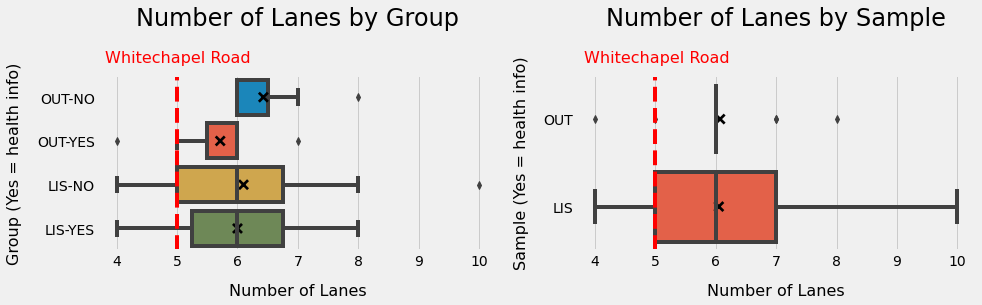

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 3))

sns.boxplot(data=df, x="number_of_lanes", y="group", ax=ax1)
ax1.axvline(x=5, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="number_of_lanes", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Number of Lanes", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Number of Lanes by Group", fontsize=24, pad=50)

ax1.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="number_of_lanes", y="sample", ax=ax2)
ax2.axvline(x=5, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="number_of_lanes", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Number of Lanes", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Number of Lanes by Sample", fontsize=24, pad=50)

ax2.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

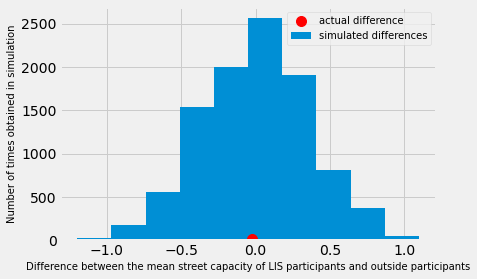

In [131]:
df_lis = df[df['sample'] == 'LIS']
df_out = df[df['sample'] == 'OUT']

lis_capacity = np.array(df_lis["number_of_lanes"])
out_capacity = np.array(df_out["number_of_lanes"])

n_lis_yes = len(lis_capacity)
n_lis_no = len(out_capacity)

real_difference = np.mean(lis_capacity) - np.mean(out_capacity)

pooled = np.concatenate([lis_capacity, out_capacity])
shuffled = rng.permutation(pooled)

example_diffs = np.zeros(10000)

for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff


plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [132]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)

proportion = n_as_high / 10000
n_as_high, proportion

(5262, 0.5262)

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


Text(0.39, 1.1, 'Whitechapel Road')

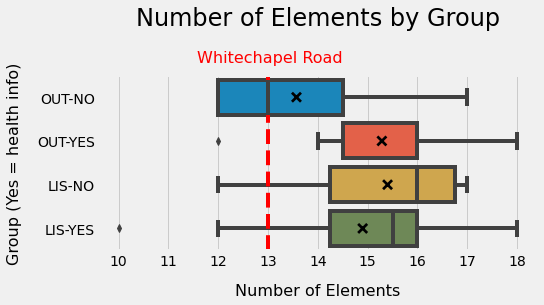

In [133]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(data=df, x="number_of_elements", y="group")
plt.axvline(x=13, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="number_of_elements", y="group", color="black", join=False, markers="x", scale=0.5, ci=None)

plt.xlabel("Number of Elements", fontsize=16, labelpad=15)
plt.ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
plt.title("Number of Elements by Group", fontsize=24, pad=50)

ax.text(0.39, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax.transAxes, fontsize=16, color='red')

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


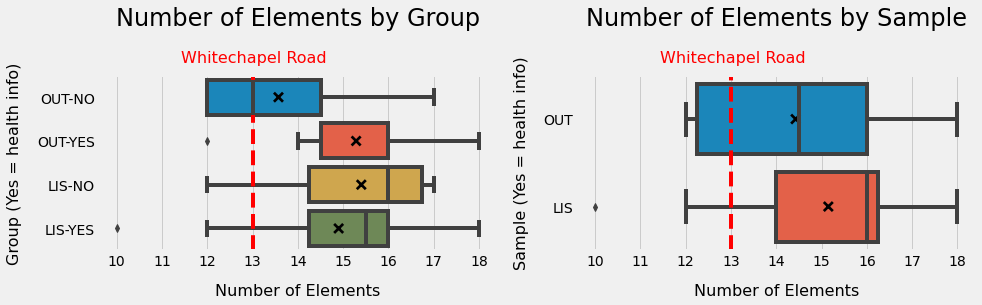

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 3))

sns.boxplot(data=df, x="number_of_elements", y="group", ax=ax1)
ax1.axvline(x=13, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="number_of_elements", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Number of Elements", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Number of Elements by Group", fontsize=24, pad=50)

ax1.text(0.39, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="number_of_elements", y="sample", ax=ax2)
ax2.axvline(x=13, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="number_of_elements", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Number of Elements", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Number of Elements by Sample", fontsize=24, pad=50)

ax2.text(0.39, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

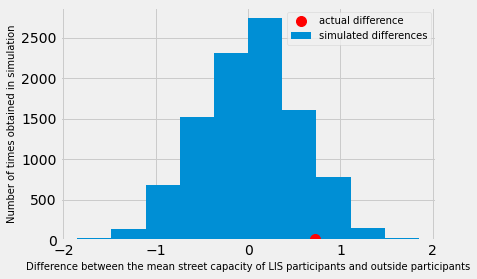

In [135]:
# get LIS sample
df_lis = df[df['sample'] == 'LIS']
df_out = df[df['sample'] == 'OUT']

lis_capacity = np.array(df_lis["number_of_elements"])
out_capacity = np.array(df_out["number_of_elements"])

n_lis_yes = len(lis_capacity)
n_lis_no = len(out_capacity)

real_difference = np.mean(lis_capacity) - np.mean(out_capacity)

pooled = np.concatenate([lis_capacity, out_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff


plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [136]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)

proportion = n_as_high / 10000
n_as_high, proportion

(953, 0.0953)

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


Text(0.5, 1.0, 'Space per Lane by Group')

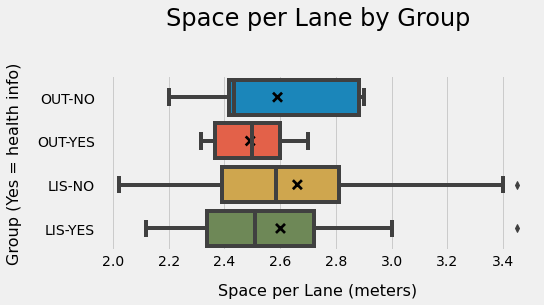

In [137]:
df['space_per_lane'] = df['movement_space'] / df['number_of_lanes']

fig, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(data=df, x="space_per_lane", y="group")
#plt.axvline(x=62000, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="space_per_lane", y="group", color="black", join=False, markers="x", scale=0.5, ci=None)

plt.xlabel("Space per Lane (meters)", fontsize=16, labelpad=15)
plt.ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
plt.title("Space per Lane by Group", fontsize=24, pad=50)

#ax.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax.transAxes, fontsize=16, color='red')

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


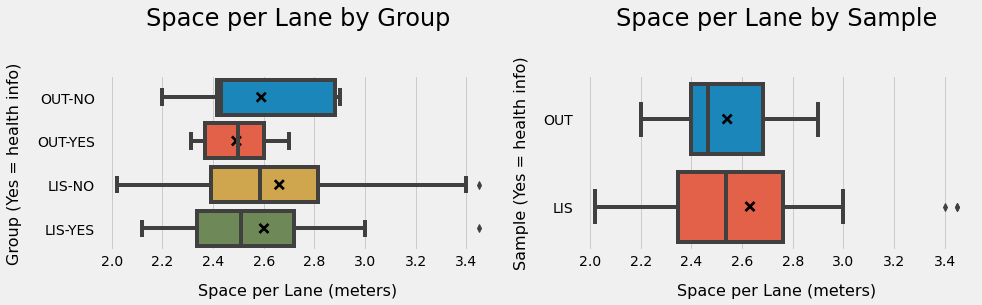

In [138]:
df['space_per_lane'] = df['movement_space'] / df['number_of_lanes']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 3))

sns.boxplot(data=df, x="space_per_lane", y="group", ax=ax1)
#ax1.axvline(x=62000, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="space_per_lane", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Space per Lane (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Space per Lane by Group", fontsize=24, pad=50)

#ax1.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="space_per_lane", y="sample", ax=ax2)
#ax2.axvline(x=62000, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="space_per_lane", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Space per Lane (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Space per Lane by Sample", fontsize=24, pad=50)

#ax2.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

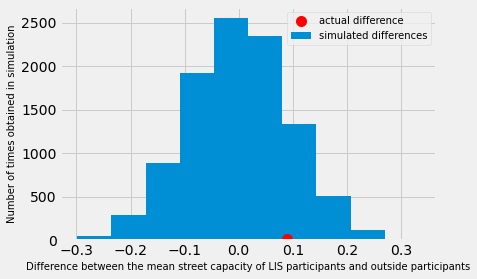

In [139]:
# get LIS sample
df_lis = df[df['sample'] == 'LIS']
df_out = df[df['sample'] == 'OUT']

lis_capacity = np.array(df_lis["space_per_lane"])
out_capacity = np.array(df_out["space_per_lane"])

n_lis_yes = len(lis_capacity)
n_lis_no = len(out_capacity)

real_difference = np.mean(lis_capacity) - np.mean(out_capacity)

pooled = np.concatenate([lis_capacity, out_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff


plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [140]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)

proportion = n_as_high / 10000
n_as_high, proportion

(1733, 0.1733)

## Permutation of capactiy of lis and outside groups

In [141]:
lis_capacity = np.array(df_lis['capacity'])
out_capacity = np.array(df_out['capacity'])

n_lis = len(lis_capacity)
n_out = len(out_capacity)

In [142]:
pooled = np.concatenate([lis_capacity, out_capacity])
pooled

array([ 93000,  75000,  62000,  67000,  57000, 109000,  97000,  64000,
        90000,  72000,  64000,  90000,  72000,  66000,  40000,  90000,
        68000,  66000,  66000,  90000,  57000,  64000,  90000,  60500,
        67000,  40000,  58000,  62000,  75000,  72000,  57000,  60500,
        63000,  71500])

In [143]:
shuffled = rng.permutation(pooled)
shuffled

array([ 67000, 109000,  93000,  72000,  68000,  71500,  75000,  90000,
        66000,  60500,  66000,  72000,  90000,  72000,  75000,  97000,
        40000,  57000,  64000,  57000,  57000,  67000,  66000,  90000,
        40000,  64000,  63000,  58000,  60500,  90000,  64000,  62000,
        90000,  62000])

In [144]:
fake_lis = shuffled[:20]
fake_out = shuffled[20:]
len(fake_out)

14

In [145]:
real_difference = np.mean(lis_capacity) - np.mean(out_capacity)
real_difference

10792.857142857145

In [146]:
fake_difference = np.mean(fake_lis) - np.mean(fake_out)
fake_difference

6421.428571428565

In [147]:
shuffled = rng.permutation(pooled)
fake_difference_2 = np.mean(shuffled[:20]) - np.mean(shuffled[20:])
fake_difference_2

11460.714285714283

In [148]:
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis]
    fake_out = shuffled[n_out:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff

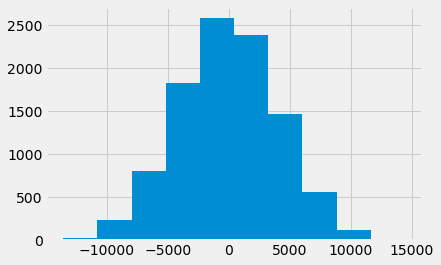

In [149]:
plt.hist(example_diffs);

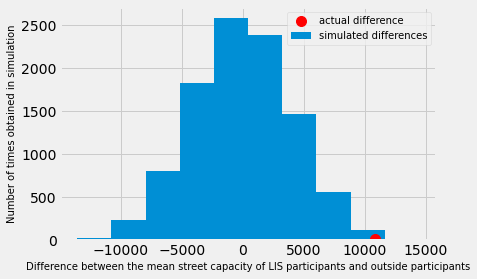

In [150]:
plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

So conclusion is that there is probably a real difference between the two groups because the actual difference is very unlikely in the sample of 10000 simulated differences.

In [151]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

24

In [152]:
proportion = n_as_high / 10000
proportion

0.0024

## Permutation of no vs yes

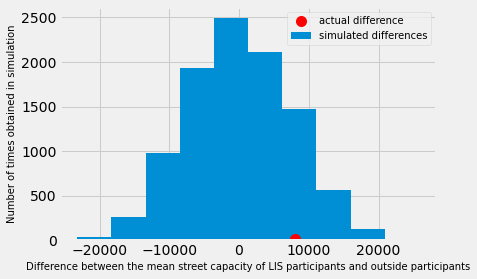

In [153]:
lis_yes_capacity = np.array(df_lis_yes['capacity'])
lis_no_capacity = np.array(df_lis_no['capacity'])

n_lis_yes = len(lis_yes_capacity)
n_lis_no = len(lis_no_capacity)

real_difference = np.mean(lis_yes_capacity) - np.mean(lis_no_capacity)

pooled = np.concatenate([lis_yes_capacity, lis_no_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff


plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [154]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

1498

In [155]:
proportion = n_as_high / 10000
proportion

0.1498

Could be more surprising

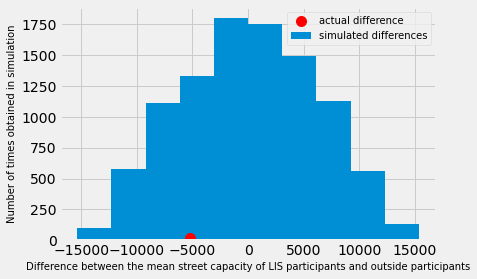

In [156]:
out_yes_capacity = np.array(df_out_yes['capacity'])
out_no_capacity = np.array(df_out_no['capacity'])

n_lis_yes = len(out_yes_capacity)
n_lis_no = len(out_no_capacity)

real_difference = np.mean(out_yes_capacity) - np.mean(out_no_capacity)

pooled = np.concatenate([out_yes_capacity, out_no_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff


plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [157]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

7849

In [158]:
proportion = n_as_high / 10000
proportion

0.7849

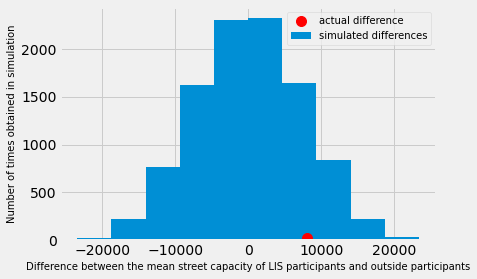

In [159]:
lis_yes_capacity = np.array(df_lis_yes['capacity'])
lis_no_capacity = np.array(df_lis_no['capacity'])

n_lis_yes = len(lis_yes_capacity)
n_lis_no = len(lis_no_capacity)

real_difference = np.mean(lis_yes_capacity) - np.mean(lis_no_capacity)

pooled = np.concatenate([lis_yes_capacity, lis_no_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    example_diffs[i] = eg_diff


plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);



## Vegetation

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


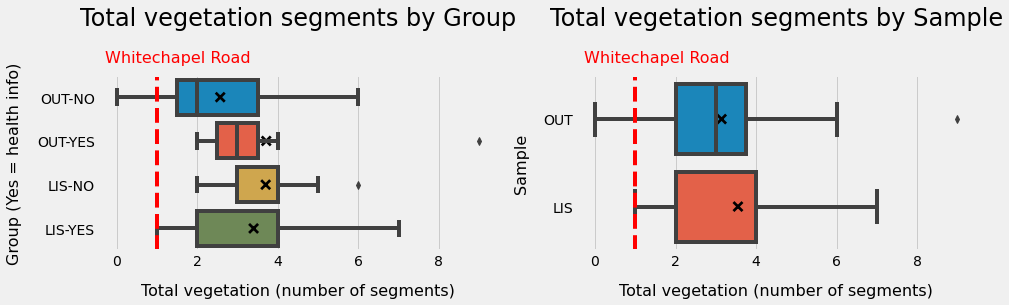

In [163]:
df['Total veg number'] = df['Trees number'] + df['Other veg number']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 3))

sns.boxplot(data=df, x="Total veg number", y="group", ax=ax1)
ax1.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg number", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Total vegetation (number of segments)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Total vegetation segments by Group", fontsize=24, pad=50)

ax1.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="Total veg number", y="sample", ax=ax2)
ax2.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg number", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Total vegetation (number of segments)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Total vegetation segments by Sample", fontsize=24, pad=50)

ax2.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

In [164]:
df[df['sample'] == 'LIS']['Total veg number'].median()

4.0

In [199]:
# Permutation test for OUT-NO and OUT-YES for the number of vegetation segments
# Get the data for OUT-NO and OUT-YES
out_no = df.loc[df['group'] == 'OUT-NO', 'Total veg number']
out_yes = df.loc[df['group'] == 'OUT-YES', 'Total veg number']

# Compute the observed difference in means
obs_diff = np.mean(out_yes) - np.mean(out_no)

# Concatenate the data and shuffle the labels
data = np.concatenate([out_no, out_yes])
n_permutations = 10000
diffs = np.zeros(n_permutations)
for i in range(n_permutations):
    np.random.shuffle(data)
    permuted_out_no = data[:len(out_no)]
    permuted_out_yes = data[len(out_no):]
    diffs[i] = np.mean(permuted_out_yes) - np.mean(permuted_out_no)

# Compute the p-value
p_value = np.sum(diffs >= obs_diff) / n_permutations

print(f"Observed difference in means: {obs_diff:.2f}")
print(f"P-value: {p_value:.4f}")

Observed difference in means: 1.14
P-value: 0.2249


/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(

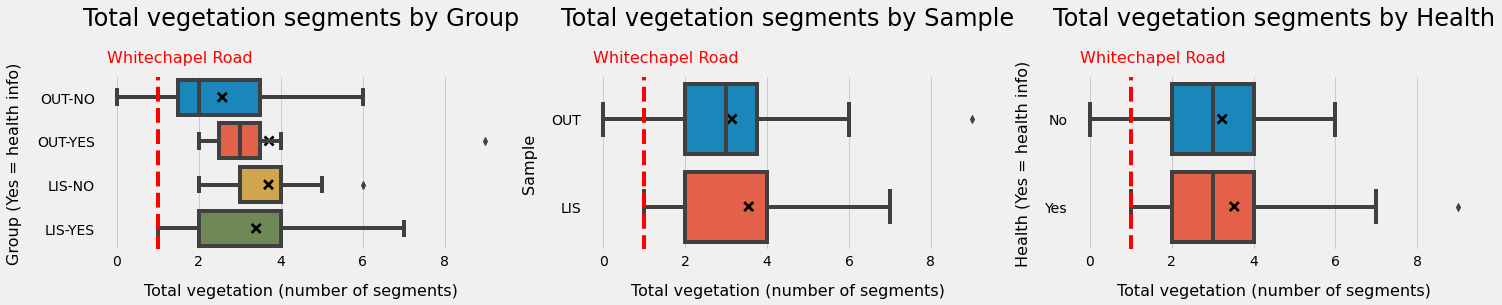

In [203]:
df['Total veg number'] = df['Trees number'] + df['Other veg number']

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(22, 3))

sns.boxplot(data=df, x="Total veg number", y="group", ax=ax1)
ax1.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg number", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Total vegetation (number of segments)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Total vegetation segments by Group", fontsize=24, pad=50)

ax1.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="Total veg number", y="sample", ax=ax2)
ax2.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg number", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Total vegetation (number of segments)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Total vegetation segments by Sample", fontsize=24, pad=50)

ax2.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="Total veg number", y="health", ax=ax3)
ax3.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg number", y="health", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax3)

ax3.set_xlabel("Total vegetation (number of segments)", fontsize=16, labelpad=15)
ax3.set_ylabel("Health (Yes = health info)", fontsize=16, labelpad=15)
ax3.set_title("Total vegetation segments by Health", fontsize=24, pad=50)

ax3.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax3.transAxes, fontsize=16, color='red')

plt.show()

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


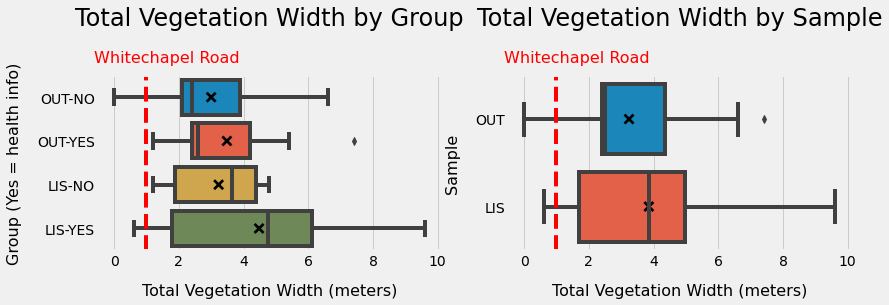

In [166]:
df['Total veg width'] = df['trees_width'] + df['other_veg_width']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="Total veg width", y="group", ax=ax1)
ax1.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg width", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Total Vegetation Width (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Total Vegetation Width by Group", fontsize=24, pad=50, loc="center")

ax1.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="Total veg width", y="sample", ax=ax2)
ax2.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg width", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Total Vegetation Width (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Total Vegetation Width by Sample", fontsize=24, pad=50, loc="center")

ax2.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(

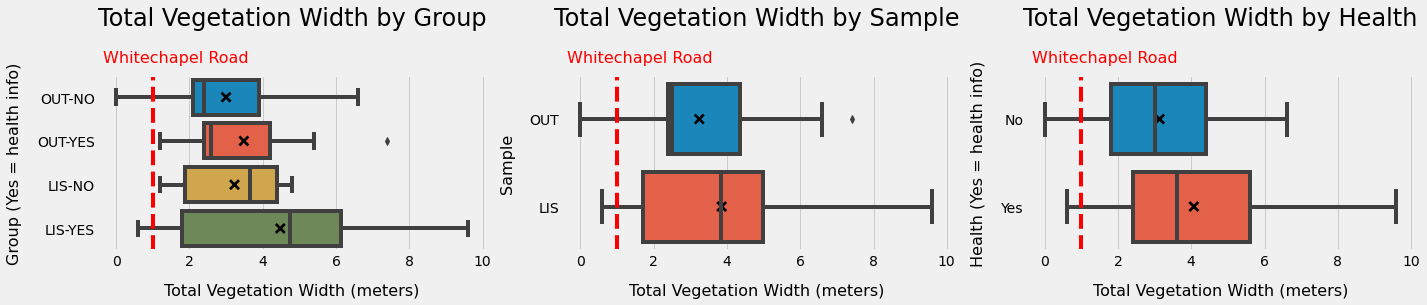

In [205]:
df['Total veg width'] = df['trees_width'] + df['other_veg_width']

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21, 3))

sns.boxplot(data=df, x="Total veg width", y="group", ax=ax1)
ax1.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg width", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Total Vegetation Width (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Total Vegetation Width by Group", fontsize=24, pad=50, loc="center")

ax1.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="Total veg width", y="sample", ax=ax2)
ax2.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg width", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Total Vegetation Width (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Total Vegetation Width by Sample", fontsize=24, pad=50, loc="center")

ax2.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="Total veg width", y="health", ax=ax3)
ax3.axvline(x=1, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="Total veg width", y="health", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax3)

ax3.set_xlabel("Total Vegetation Width (meters)", fontsize=16, labelpad=15)
ax3.set_ylabel("Health (Yes = health info)", fontsize=16, labelpad=15)
ax3.set_title("Total Vegetation Width by Health", fontsize=24, pad=50, loc="center")

ax3.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax3.transAxes, fontsize=16, color='red')

plt.show()

In [207]:
# OUT-YES vs OUT-NO permutation test
out_no = df.loc[df['group'] == 'OUT-NO', 'Total veg width']
out_yes = df.loc[df['group'] == 'OUT-YES', 'Total veg width']
permutation_test(out_no, out_yes, 10000)

Observed difference in means: 0.49
P-value: 0.3390


(0.4857142857142853, 0.339)

In [208]:
# LIS-YES vs LIS-NO permutation test
lis_no = df.loc[df['group'] == 'LIS-NO', 'Total veg width']
lis_yes = df.loc[df['group'] == 'LIS-YES', 'Total veg width']
permutation_test(lis_no, lis_yes, 10000)

Observed difference in means: 1.25
P-value: 0.1213


(1.25, 0.1213)

In [209]:
# YES vs NO permutation test
lis_no = df.loc[df['health'] == 'No', 'Total veg width']
lis_yes = df.loc[df['health'] == 'Yes', 'Total veg width']
permutation_test(lis_no, lis_yes, 10000)

Observed difference in means: 0.94
P-value: 0.1142


(0.9352941176470586, 0.1142)

In [212]:
# LIS vs OUT permutation test
lis_no = df.loc[df['sample'] == 'LIS', 'Total veg width']
lis_yes = df.loc[df['sample'] == 'OUT', 'Total veg width']
permutation_test(lis_yes, lis_no, 10000)

Observed difference in means: 0.61
P-value: 0.2215


(0.612142857142858, 0.2215)

## Polluting vs non polluting

<AxesSubplot:xlabel='polluting_space', ylabel='group'>

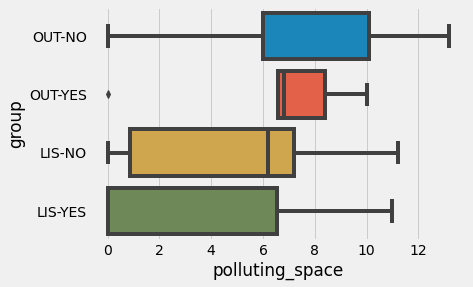

In [167]:
sns.boxplot(data=df, x="polluting_space", y="group")

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


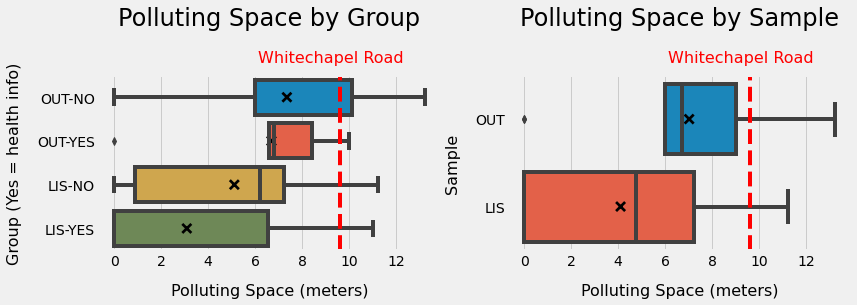

In [168]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="polluting_space", y="group", ax=ax1)
ax1.axvline(x=9.6, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="polluting_space", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Polluting Space (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Polluting Space by Group", fontsize=24, pad=50)

ax1.text(0.68, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="polluting_space", y="sample", ax=ax2)
ax2.axvline(x=9.6, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="polluting_space", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Polluting Space (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Polluting Space by Sample", fontsize=24, pad=50)

ax2.text(0.68, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

In [225]:
# out-no median
out_no = df.loc[df['group'] == 'OUT-NO', 'polluting_space']
np.median(out_no)

6.0

In [224]:
# LIS vs OUT permutation test
data_1 = df.loc[df['sample'] == 'LIS', 'polluting_space']
data_2 = df.loc[df['sample'] == 'OUT', 'polluting_space']
permutation_test(data_1, data_2, 10000)


Observed difference in means: 2.91
P-value: 0.0219


(2.9142857142857137, 0.0219)

In [226]:
# LIS-YES vs LIS-NO permutation test
data_1 = df.loc[df['group'] == 'LIS-YES', 'polluting_space']
data_2 = df.loc[df['group'] == 'LIS-NO', 'polluting_space']
permutation_test(data_1, data_2, 10000)

Observed difference in means: 2.02
P-value: 0.1506


(2.0200000000000005, 0.1506)

<AxesSubplot:xlabel='Drive lane width', ylabel='group'>

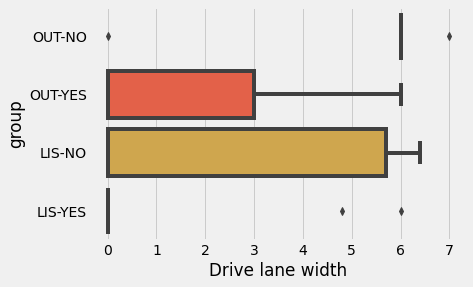

In [213]:
# Drive lane width
sns.boxplot(data=df, x="Drive lane width", y="group")

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


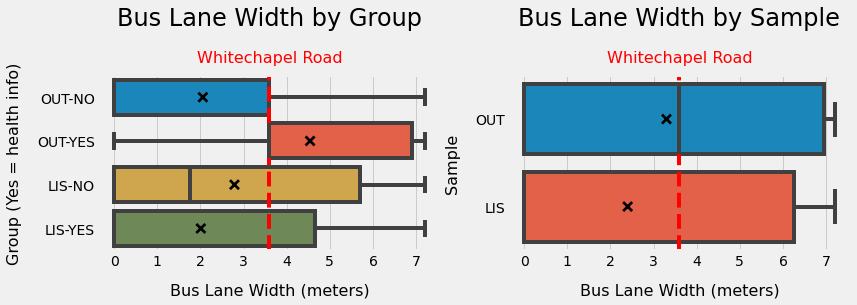

In [242]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="bus lane width", y="group", ax=ax1)
ax1.axvline(x=3.6, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="bus lane width", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Bus Lane Width (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Bus Lane Width by Group", fontsize=24, pad=50)

ax1.text(0.5, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="bus lane width", y="sample", ax=ax2)
ax2.axvline(x=3.6, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="bus lane width", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Bus Lane Width (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Bus Lane Width by Sample", fontsize=24, pad=50)

ax2.text(0.5, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

In [249]:
# median for LIS-YES
lis_yes = df.loc[df['group'] == 'LIS-YES', 'bus lane width']
np.median(lis_yes)

0.0

In [250]:
# median for LIS
lis = df.loc[df['sample'] == 'LIS', 'bus lane width']
np.median(lis)

0.0

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


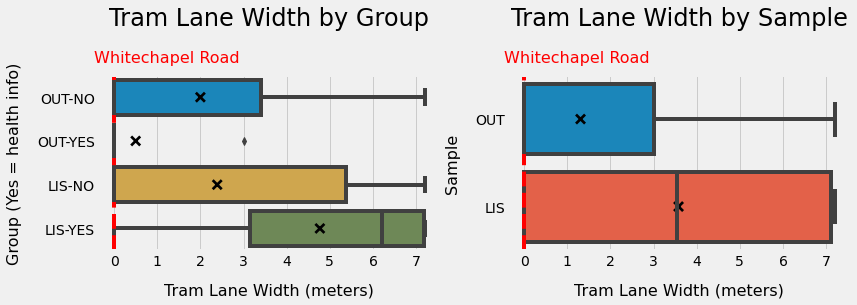

In [248]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="tram lane width", y="group", ax=ax1)
ax1.axvline(x=0, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="tram lane width", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Tram Lane Width (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Tram Lane Width by Group", fontsize=24, pad=50)

ax1.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="tram lane width", y="sample", ax=ax2)
ax2.axvline(x=0, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="tram lane width", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Tram Lane Width (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Tram Lane Width by Sample", fontsize=24, pad=50)

ax2.text(0.2, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

<AxesSubplot:xlabel='Drive lane width', ylabel='group'>

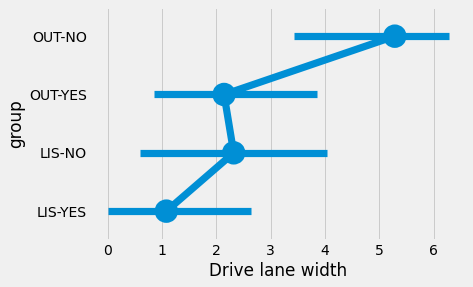

In [222]:
sns.pointplot(data=df, x="Drive lane width", y="group")

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


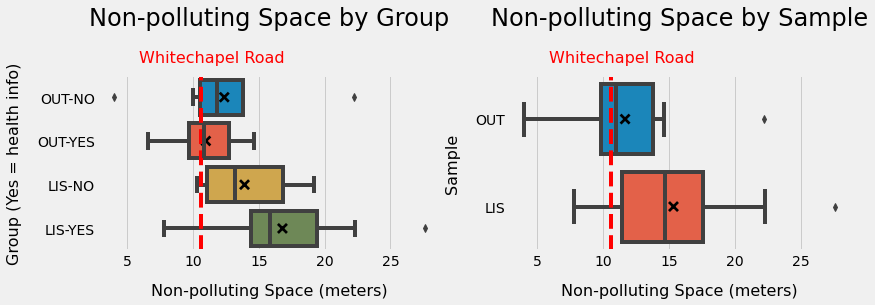

In [170]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="non-polluting_space", y="group", ax=ax1)
ax1.axvline(x=10.6, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="non-polluting_space", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Non-polluting Space (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Non-polluting Space by Group", fontsize=24, pad=50)

ax1.text(0.33, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="non-polluting_space", y="sample", ax=ax2)
ax2.axvline(x=10.6, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="non-polluting_space", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Non-polluting Space (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Non-polluting Space by Sample", fontsize=24, pad=50)

ax2.text(0.33, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

In [228]:
# LIS vs OUT permutation test
data_1 = df.loc[df['sample'] == 'LIS', 'non-polluting_space']
data_2 = df.loc[df['sample'] == 'OUT', 'non-polluting_space']
permutation_test(data_2, data_1, 10000)

Observed difference in means: 3.68
P-value: 0.0126


(3.6785714285714253, 0.0126)

In [230]:
# LIS-YES vs LIS-NO permutation test
data_1 = df.loc[df['group'] == 'LIS-YES', 'non-polluting_space']
data_2 = df.loc[df['group'] == 'LIS-NO', 'non-polluting_space']
permutation_test(data_2, data_1, 10000)

Observed difference in means: 2.88
P-value: 0.0930


(2.879999999999999, 0.093)

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


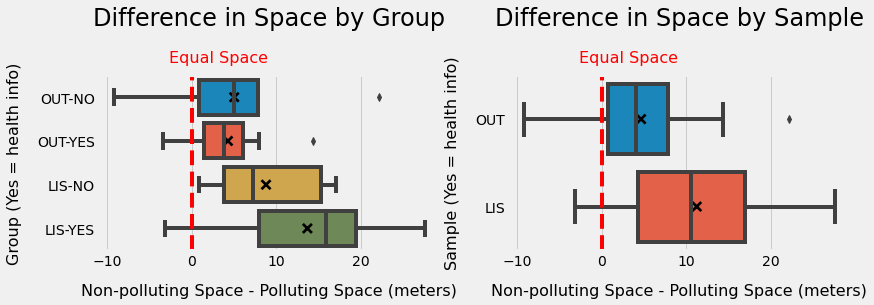

In [172]:
bob = df['non-polluting_space'] - df['polluting_space']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x=bob, y="group", ax=ax1)
ax1.axvline(x=0, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x=bob, y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Non-polluting Space - Polluting Space (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Difference in Space by Group", fontsize=24, pad=50)

ax1.text(0.35, 1.1, "Equal Space", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x=bob, y="sample", ax=ax2)
ax2.axvline(x=0, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x=bob, y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Non-polluting Space - Polluting Space (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Difference in Space by Sample", fontsize=24, pad=50)

ax2.text(0.35, 1.1, "Equal Space", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

<AxesSubplot:xlabel='other_space', ylabel='group'>

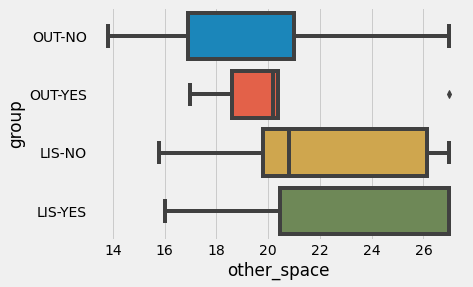

In [173]:
sns.boxplot(data=df, x="other_space", y="group")

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


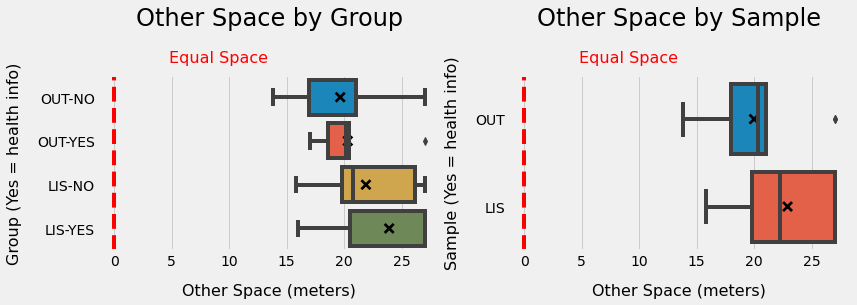

In [174]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="other_space", y="group", ax=ax1)
ax1.axvline(x=0, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="other_space", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Other Space (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Other Space by Group", fontsize=24, pad=50)

ax1.text(0.35, 1.1, "Equal Space", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="other_space", y="sample", ax=ax2)
ax2.axvline(x=0, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="other_space", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Other Space (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Other Space by Sample", fontsize=24, pad=50)

ax2.text(0.35, 1.1, "Equal Space", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

## Movement vs Stationary

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


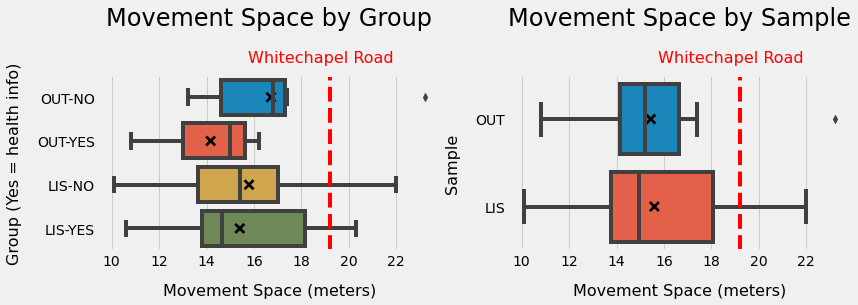

In [175]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="movement_space", y="group", ax=ax1)
ax1.axvline(x=19.2, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="movement_space", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Movement Space (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Movement Space by Group", fontsize=24, pad=50)

ax1.text(0.65, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="movement_space", y="sample", ax=ax2)
ax2.axvline(x=19.2, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="movement_space", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Movement Space (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Movement Space by Sample", fontsize=24, pad=50)

ax2.text(0.65, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

In [252]:
# OUT-YES vs OUT-NO (movement_space) - permutation test
data_1 = df.loc[df['group'] == 'OUT-YES', 'movement_space']
data_2 = df.loc[df['group'] == 'OUT-NO', 'movement_space']
permutation_test(data_1, data_2, 10000)

Observed difference in means: 2.54
P-value: 0.0540


(2.5428571428571427, 0.054)

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


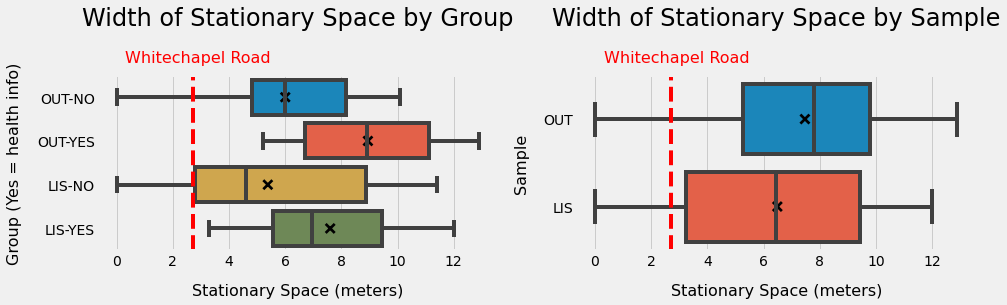

In [176]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 3))

sns.boxplot(data=df, x="stationary_space", y="group", ax=ax1)
ax1.axvline(x=2.7, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="stationary_space", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Stationary Space (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Width of Stationary Space by Group", fontsize=24, pad=50)

ax1.text(0.25, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="stationary_space", y="sample", ax=ax2)
ax2.axvline(x=2.7, color='red', linestyle='--', label='Whitechapel Road')

sns.pointplot(data=df, x="stationary_space", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Stationary Space (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample", fontsize=16, labelpad=15)
ax2.set_title("Width of Stationary Space by Sample", fontsize=24, pad=50)

ax2.text(0.25, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

In [255]:
# Yes vs No (stationary_space) - permutation test
data_1 = df.loc[df['health'] == 'Yes', 'stationary_space']
data_2 = df.loc[df['health'] == 'No', 'stationary_space']
permutation_test(data_2, data_1, 10000)

Observed difference in means: 2.52
P-value: 0.0166


(2.5176470588235302, 0.0166)

In [257]:
# LIS-YES vs LIS-NO (stationary_space) - permutation test
data_1 = df.loc[df['group'] == 'LIS-YES', 'stationary_space']
data_2 = df.loc[df['group'] == 'LIS-NO', 'stationary_space']
permutation_test(data_2, data_1, 10000)

Observed difference in means: 2.22
P-value: 0.0947


(2.219999999999999, 0.0947)

In [259]:
# OUT-YES vs OUT-NO (stationary_space) - permutation test
data_1 = df.loc[df['group'] == 'OUT-YES', 'stationary_space']
data_2 = df.loc[df['group'] == 'OUT-NO', 'stationary_space']
permutation_test(data_2, data_1, 10000)

Observed difference in means: 2.94
P-value: 0.0532


(2.9428571428571413, 0.0532)

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


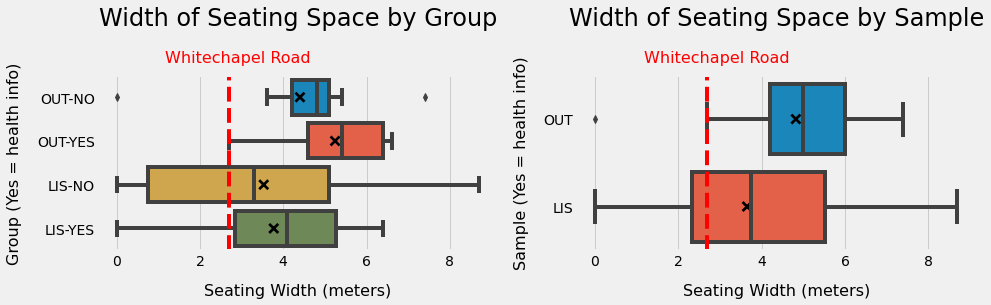

In [190]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 3))

sns.boxplot(data=df, x="seating_width", y="group", ax=ax1)
ax1.axvline(x=2.7, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="seating_width", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Seating Width (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Width of Seating Space by Group", fontsize=24, pad=50)

ax1.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="seating_width", y="sample", ax=ax2)
ax2.axvline(x=2.7, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="seating_width", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Seating Width (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Width of Seating Space by Sample", fontsize=24, pad=50)

ax2.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


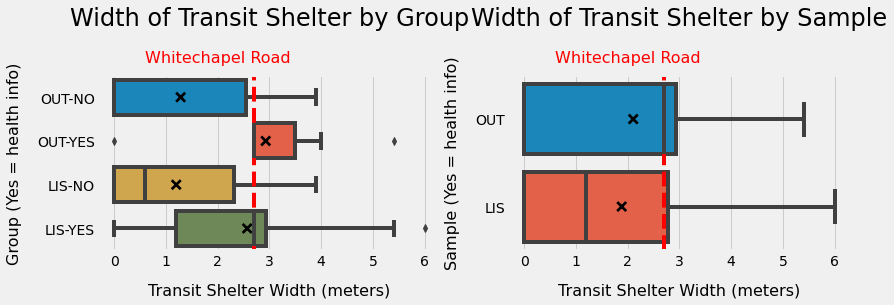

In [192]:
# Transit Shelter Width
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

sns.boxplot(data=df, x="transit_shelter_width", y="group", ax=ax1)
ax1.axvline(x=2.7, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="transit_shelter_width", y="group", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax1)

ax1.set_xlabel("Transit Shelter Width (meters)", fontsize=16, labelpad=15)
ax1.set_ylabel("Group (Yes = health info)", fontsize=16, labelpad=15)
ax1.set_title("Width of Transit Shelter by Group", fontsize=24, pad=50)

ax1.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax1.transAxes, fontsize=16, color='red')

sns.boxplot(data=df, x="transit_shelter_width", y="sample", ax=ax2)
ax2.axvline(x=2.7, color='red', linestyle='--', label='Equal Space')

sns.pointplot(data=df, x="transit_shelter_width", y="sample", color="black", join=False, markers="x", scale=0.5, ci=None, ax=ax2)

ax2.set_xlabel("Transit Shelter Width (meters)", fontsize=16, labelpad=15)
ax2.set_ylabel("Sample (Yes = health info)", fontsize=16, labelpad=15)
ax2.set_title("Width of Transit Shelter by Sample", fontsize=24, pad=50)

ax2.text(0.35, 1.1, "Whitechapel Road", ha='center', va='center', transform=ax2.transAxes, fontsize=16, color='red')

plt.show()

<AxesSubplot:xlabel='bike_rack_width', ylabel='group'>

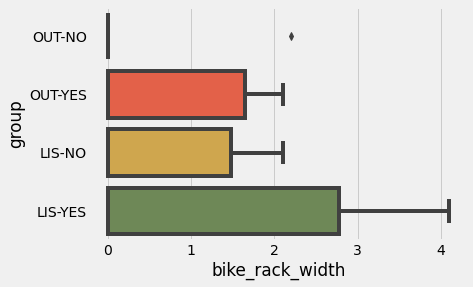

In [179]:
# Bike Rack Width
sns.boxplot(data=df, x="bike_rack_width", y="group")

## Public transport

<AxesSubplot:xlabel='public_transport_width', ylabel='group'>

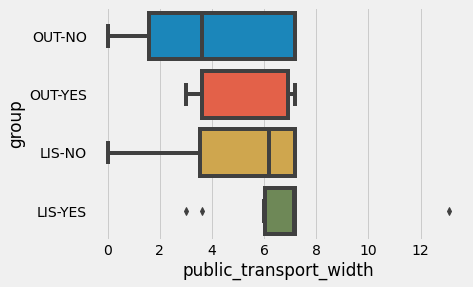

In [180]:
sns.boxplot(data=df, x="public_transport_width", y="group")

In [181]:
df.groupby('group').mean()['public_transport_width'].iloc[1]

/var/folders/qt/1zhwft1j5dx5rp5_b5rbl__c0000gn/T/ipykernel_95020/2811333213.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('group').mean()['public_transport_width'].iloc[1]


6.779999999999999

<AxesSubplot:ylabel='group'>

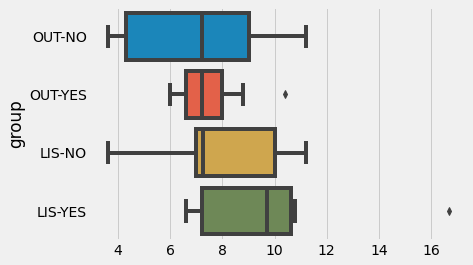

In [186]:
bob = df['public_transport_width'] + df['bike_lane_width']

sns.boxplot(data=df, x=bob, y="group")